# **Libraries**

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob as glob
%matplotlib inline
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn import preprocessing
import cv2
import os
import random

# **Data**

**Importing and pre-processing data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
norm_factor = 255.

In [4]:
path = '/content/drive/MyDrive/S4.PFE1/data/training/denoised'
imageList = os.listdir(path)
HR_images_list_train = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY) 
            picture = cv2.resize(picture,(56,56))
            picture = picture.astype(np.float32)/norm_factor
            picture = np.array(picture)
            HR_images_list_train.append(picture)

In [5]:
path = '/content/drive/MyDrive/S4.PFE1/data/test/denoised'
imageList = os.listdir(path)
HR_images_list_test = []
for image in (imageList):
            picture = cv2.imread(os.path.join(path,image))
            picture = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
            picture = picture.astype(np.float32)/norm_factor 
            picture = cv2.resize(picture,(56,56))
            picture = np.array(picture)
            HR_images_list_test.append(picture)

In [6]:
x_train = HR_images_list_train
x_test = HR_images_list_test

In [7]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [8]:
x_train.shape

(2410, 56, 56)

In [9]:
x_test.shape

(1205, 56, 56)

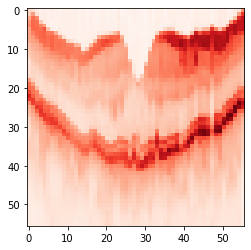

In [ ]:

plt.imshow(x_train[1], cmap = 'Reds')


In [ ]:
dimension = x_train.shape[1]
dimension

56

**Pre-processing data**

Here, we need to noisy the images, then, we apply a speckle noisy matrix and clip the images between 0 and 1.

In [ ]:
import torch 
import random
from skimage.util import random_noise
def speckle(img) :
  hasil = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
  hasil = hasil.numpy()
  return hasil 
    

In [ ]:
x_train_noisy = speckle(x_train)
x_test_noisy = speckle(x_test)


Visualizing some noise images images.

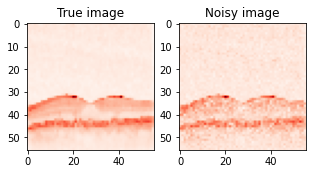

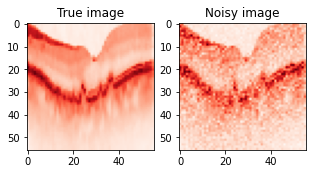

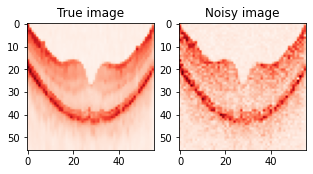

In [ ]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 5)
    axes[0].set_title('True image')
    im0 = axes[0].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds') 
    axes[1].set_title('Noisy image')
    im1 = axes[1].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds')

# **Building the GAN**

In [ ]:
input_img = keras.Input(shape = (56, 56, 1))

 **Generator**

In [ ]:
#SR-GAN
#Block 1 
x1 = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(input_img)

#Block 2
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x1)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x2 = layers.Add()([x1,x])
#Block 3
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x2)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x3 = layers.Add()([x2,x])
#Block 4
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x3)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x4 = layers.Add()([x3,x])
#Block 5
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x4)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x5 = layers.Add()([x4,x])
#Block 6
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x5)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x = layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)(x)
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x6 = layers.Add()([x5,x])
#Block 7
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x6)

x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x7 = layers.Add()([x1,x])
#Block 8 
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x7)
#x8 = layers.UpSampling2D(size = (2, 2))(x)
x8 = layers.Conv2DTranspose(filters=30,kernel_size=(3,3),strides=(1, 1),padding='same',output_padding=None,data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None,)(x)
#Block 9
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x8)
#x9 = layers.UpSampling2D(size = (2, 2))(x)
x9 = layers.Conv2DTranspose(filters=32,kernel_size=(3,3),strides=(1, 1),padding='same',output_padding=None,data_format=None,dilation_rate=(1, 1),activation=None,use_bias=True,kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None,bias_regularizer=None,activity_regularizer=None,kernel_constraint=None,bias_constraint=None,)(x)
#Block 10
encoded = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None , padding = 'same')(x9)


**Desciminator**

In [ ]:
#SR-GAN
#Block 1 
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same')(encoded)
x1 = layers.LeakyReLU(alpha=0.3)(x)
#Block 2
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x1)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x2 = layers.LeakyReLU(alpha=0.3)(x)
#Block 3
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x2)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x3 = layers.LeakyReLU(alpha=0.3)(x)
#Block 4
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x3)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x4 = layers.LeakyReLU(alpha=0.3)(x)
#Block 5
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x4)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x5 = layers.LeakyReLU(alpha=0.3)(x)
#Block 6
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x5)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x6 = layers.LeakyReLU(alpha=0.3)(x)
#Block 7
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x6)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x7 = layers.LeakyReLU(alpha=0.3)(x)
#Block 8
x = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None, padding = 'same')(x7)
x = layers.BatchNormalization(axis=1,momentum=0.99,epsilon=0.001,center=True,scale=True,beta_initializer='zeros',gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones')(x)
x8 = layers.LeakyReLU(alpha=0.3)(x)
#Block 9
x = layers.Dense(1024)(x8)
x = layers.LeakyReLU(alpha=0.3)(x)
decoded = layers.Dense(1)(x)

**GAN**

In [ ]:
gan = keras.Model(input_img, decoded)

In [ ]:
gan.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 56, 56, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 56, 56, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 56, 56, 32)   9248        ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 56, 56, 32)  224         ['conv2d_1[0][0]']               
 alization)                                                                                   

### Compilation

In [ ]:
my_adam_optimizer = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
gan.compile(optimizer= my_adam_optimizer, loss='binary_crossentropy')

#autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #by default lr = 0.1


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Fitting

In [ ]:

validation_split = 0.9
#epochs = 51
epochs = 200                                                                                                      
history = gan.fit(x_train_noisy, x_train, epochs = epochs, batch_size = 10, shuffle = True,validation_split = validation_split )#validation_split = validation_split

Epoch 1/200
24/24 [==============================] - 5s 234ms/step - loss: 0.4929 - val_loss: 0.4877
Epoch 2/200
24/24 [==============================] - 6s 279ms/step - loss: 0.4929 - val_loss: 0.4877
Epoch 3/200
24/24 [==============================] - 5s 233ms/step - loss: 0.4929 - val_loss: 0.4877
Epoch 4/200
24/24 [==============================] - 5s 212ms/step - loss: 0.4928 - val_loss: 0.4875
Epoch 5/200
24/24 [==============================] - 6s 270ms/step - loss: 0.4927 - val_loss: 0.4877
Epoch 6/200
24/24 [==============================] - 5s 195ms/step - loss: 0.4927 - val_loss: 0.4875
Epoch 7/200
24/24 [==============================] - 5s 195ms/step - loss: 0.4928 - val_loss: 0.4874
Epoch 8/200
24/24 [==============================] - 6s 270ms/step - loss: 0.4927 - val_loss: 0.4874
Epoch 9/200
24/24 [==============================] - 6s 271ms/step - loss: 0.4926 - val_loss: 0.4873
Epoch 10/200
24/24 [==============================] - 5s 195ms/step - loss: 0.4926 - val_lo

### Tracking the history of the training stage

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

Visualizing the history of the training.

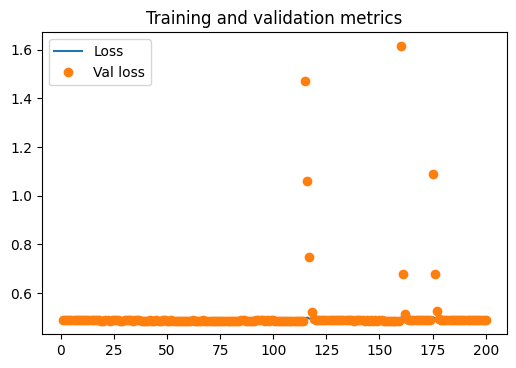

In [ ]:
plt.figure(dpi = 100)
plt.plot(epochs, train_loss, label = 'Loss')
plt.plot(epochs, train_val_loss, 'o', label = 'Val loss')
plt.title('Training and validation metrics')
plt.legend()
plt.savefig('history.png')

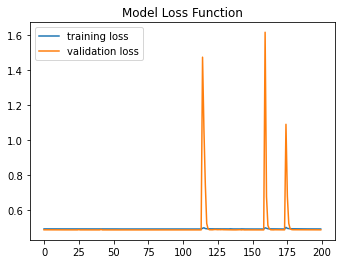

In [ ]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend();

### Prediction

In [ ]:
all_denoised_images = gan.predict(x_test_noisy)

### Evaluation

In [ ]:
test_loss  = gan.evaluate(x_test_noisy, x_test, batch_size = 20)
test_loss

61/61 [==============================] - 2s 35ms/step - loss: 0.4971


0.49707192182540894

# Visual results

Here, we can compare our visual results looking side by side the noisy, targets and denoised  images.

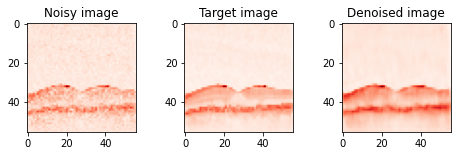

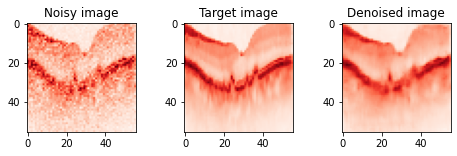

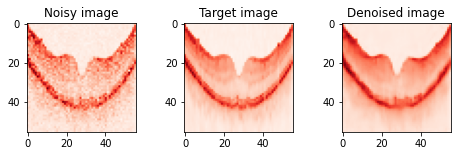

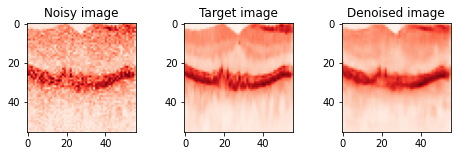

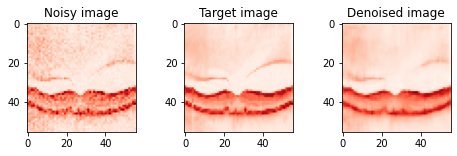

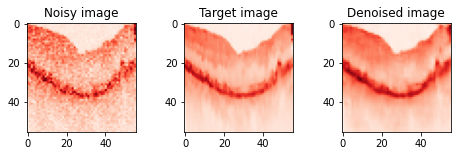

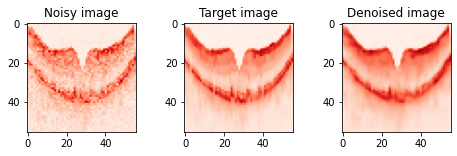

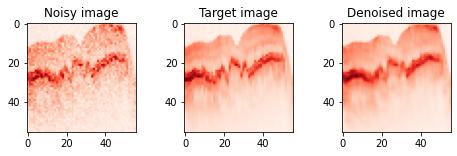

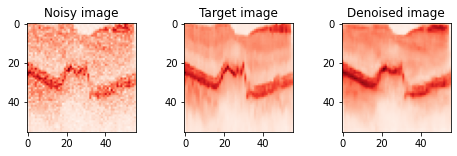

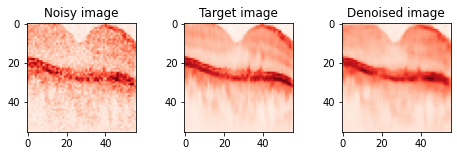

In [ ]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(x_test_noisy[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(x_test[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(all_denoised_images[i].reshape(dimension, dimension), cmap = 'Reds') #, cmap = 'Reds'
    plt.savefig(f'comparison-{i}.png')

# **Image metric**

# Rapport signal/bruit de crête (PSNR)
Dépendant du contexte, généralement plus il est élevé, mieux c'est.

In [ ]:
psnr = tf.image.psnr(x_test,x_test_noisy, max_val = 1)
psnr

<tf.Tensor: shape=(), dtype=float32, numpy=23.781378>